In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
df=pd.read_csv("C:\Ragavi Job\Skillovilla\Projects\Toyoto Price Analysis\ToyotaCorolla.csv")
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [4]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [5]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


<Axes: >

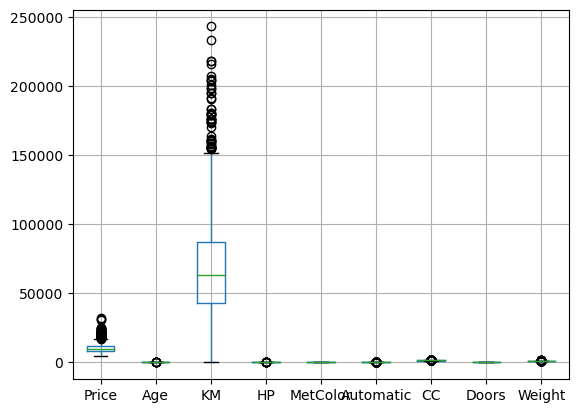

In [6]:
df.boxplot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [8]:
df['FuelType'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [9]:
df.corr()

C:\Users\Ragavi\AppData\Local\Temp\ipykernel_12932\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.165067,0.185326,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.133182,-0.148359,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.302150,-0.036197,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.050884,0.092424,0.089614
MetColor,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.034921,0.085243,0.057929
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,-0.069321,-0.027654,0.057249
CC,0.165067,-0.133182,0.302150,0.050884,0.034921,-0.069321,1.000000,0.126768,0.651450
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.126768,1.000000,0.302618
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.651450,0.302618,1.000000


C:\Users\Ragavi\AppData\Local\Temp\ipykernel_12932\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


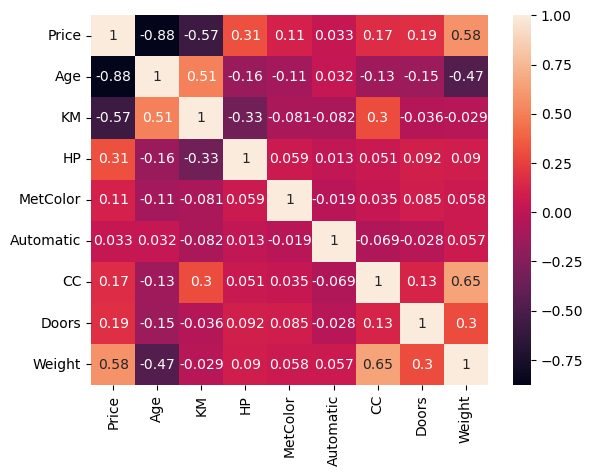

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
from the ablove plot,found that age and price are highly negatively correlated

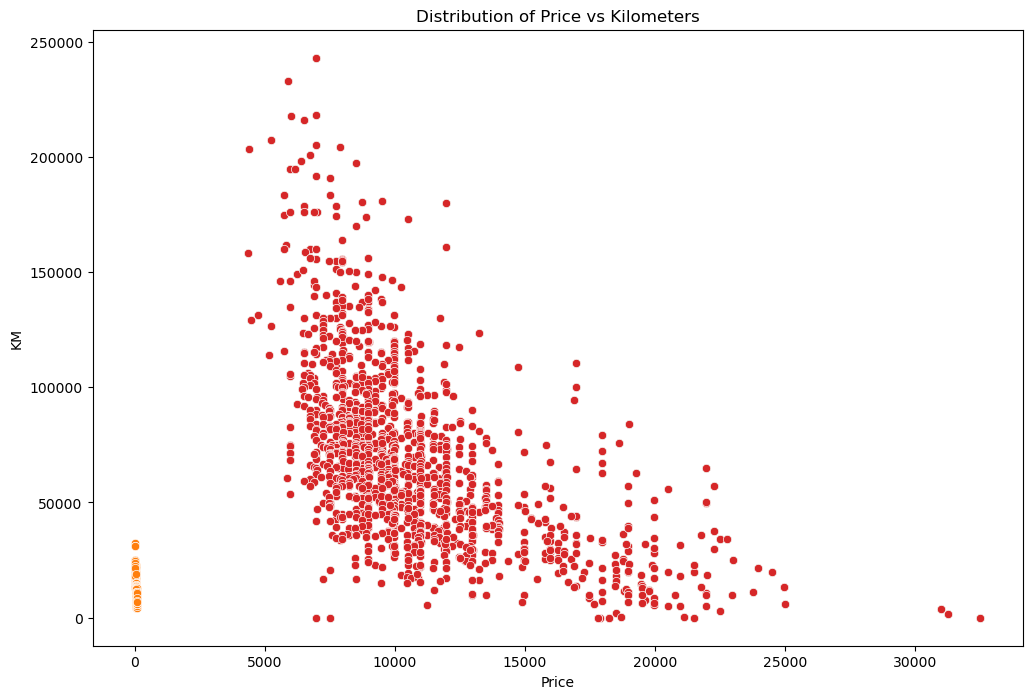

In [28]:

sns.scatterplot(x=df['Price'],y=df['KM']);
plt.title('Distribution of Price vs Kilometers');
plt.show()

In [ ]:
From the above graph,it denotes that when the km increases price descreases

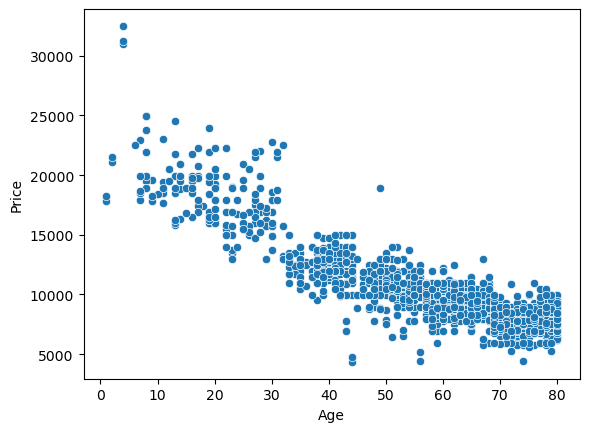

In [29]:
sns.scatterplot(x=df['Age'],y=df['Price'])
plt.show()

In [ ]:
From the above graph,it is evident that when age is increases ,price get reduced

In [34]:
df['FuelType'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

In [35]:
df=pd.get_dummies(df,drop_first=True)
df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,1,0
1,13750,23,72937,90,1,0,2000,3,1165,1,0
2,13950,24,41711,90,1,0,2000,3,1165,1,0
3,14950,26,48000,90,0,0,2000,3,1165,1,0
4,13750,30,38500,90,0,0,2000,3,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1,0,1300,3,1025,0,1
1432,10845,72,19000,86,0,0,1300,3,1015,0,1
1433,8500,71,17016,86,0,0,1300,3,1015,0,1
1434,7250,70,16916,86,1,0,1300,3,1015,0,1


In [37]:
X=df.drop(['Price'],axis=1)
X

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,23,46986,90,1,0,2000,3,1165,1,0
1,23,72937,90,1,0,2000,3,1165,1,0
2,24,41711,90,1,0,2000,3,1165,1,0
3,26,48000,90,0,0,2000,3,1165,1,0
4,30,38500,90,0,0,2000,3,1170,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1,0,1300,3,1025,0,1
1432,72,19000,86,0,0,1300,3,1015,0,1
1433,71,17016,86,0,0,1300,3,1015,0,1
1434,70,16916,86,1,0,1300,3,1015,0,1


In [38]:
y=df['Price']
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
899,62,59295,86,0,0,1300,5,1035,0,1
881,68,61568,110,1,0,1600,4,1035,0,1
310,40,38653,110,1,0,1600,5,1080,0,1
1145,75,101855,110,1,0,1600,5,1070,0,1
31,22,35199,97,1,0,1400,3,1100,0,1
...,...,...,...,...,...,...,...,...,...,...
1095,76,125778,110,0,0,1600,3,1050,0,1
1130,73,107108,110,1,0,1600,3,1050,0,1
1294,80,71740,110,1,0,1600,5,1070,0,1
860,63,64690,86,0,0,1300,3,1020,0,1


In [44]:
sc=StandardScaler()

In [45]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

array([[ 0.32969109, -0.25437232, -1.02708007, ..., -0.74551807,
        -0.35735329,  0.38321423],
       [ 0.64944782, -0.19405395,  0.59013961, ..., -0.74551807,
        -0.35735329,  0.38321423],
       [-0.84275022, -0.80214697,  0.59013961, ...,  0.13905584,
        -0.35735329,  0.38321423],
       ...,
       [ 1.28896126,  0.07587937,  0.59013961, ..., -0.05751614,
        -0.35735329,  0.38321423],
       [ 0.38298388, -0.11120576, -1.02708007, ..., -1.04037604,
        -0.35735329,  0.38321423],
       [ 1.28896126,  1.09118108,  0.59013961, ..., -0.74551807,
        -0.35735329,  0.38321423]])

# Linear Regression

In [53]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [54]:
r2_score_lr=r2_score(y_test,y_pred)
r2_score_lr

0.8463009058053603

In [56]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1432.0525686256442

# Decision Tree Regression

In [61]:
dc=DecisionTreeRegressor(random_state=42)
dc.fit(X_train,y_train)
y_pred_dc=dc.predict(X_test)

In [62]:
r2_score_dc=r2_score(y_pred_dc,y_test)
r2_score_dc

0.8566525612538793

In [64]:
rmse_dc=np.sqrt(mean_squared_error(y_test,y_pred_dc))
rmse_dc

1383.8397880635525

# Random Forest Regression

In [67]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [70]:
r2_score_rf=r2_score(y_test,y_pred_rf)
r2_score_rf

0.913279151182142

In [71]:
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
rmse_rf

1075.6848860717826

In [76]:
models=[('Linear Regression',r2_score_lr,rmse),
('Decision Tree Regression',r2_score_dc,rmse_dc),
('Random Forest Regression',r2_score_rf,rmse_rf)]

In [77]:
output=pd.DataFrame(data=models,columns=['Model','R2_score','RMSE'])
output

,Model,R2_score,RMSE
0,Linear Regression,0.846301,1432.052569
1,Decision Tree Regression,0.856653,1383.839788
2,Random Forest Regression,0.913279,1075.684886


In [ ]:
Rmse score is high for Decision Tree whereas Random Forest has low score indicating it performs well

In [ ]:
Conclusion :
We have observed that:

Age plays an importanct factor in deciding the price of the used cars.
Kilometers run by a car are also a decisive factor of the price as more the distance covered , less the price becomes